In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans

In [2]:
df = pd.read_csv("/kaggle/input/tsne-scores-csv/tsne_scores.csv")
MinPts = 4
k=MinPts+1
neighbor = NearestNeighbors(n_neighbors=k)
neighbor.fit(df)
dis,_=neighbor.kneighbors(df)
eps = np.max(dis,axis=1).max()


In [3]:
dbscan = DBSCAN(eps = eps, min_samples = MinPts)
dbscan.fit(df)
label=dbscan.labels_

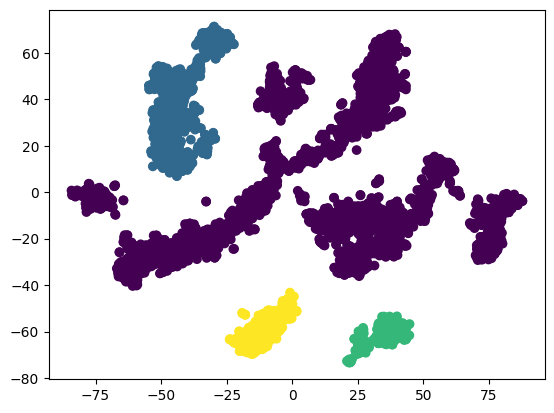

In [4]:
plt.scatter(df['t-SNE-1'],df['t-SNE-2'],c=label, cmap='viridis')
plt.show()

In [ ]:

SSE=[]
k_value = range(2,10) 
for i in k_value:
    kmean = KMeans(n_clusters=i, random_state = 42 , n_init=10)
    kmean.fit(df)
    SSE.append(kmean.inertia_)
    
plt.plot(k_value,SSE,marker='*')
plt.show()

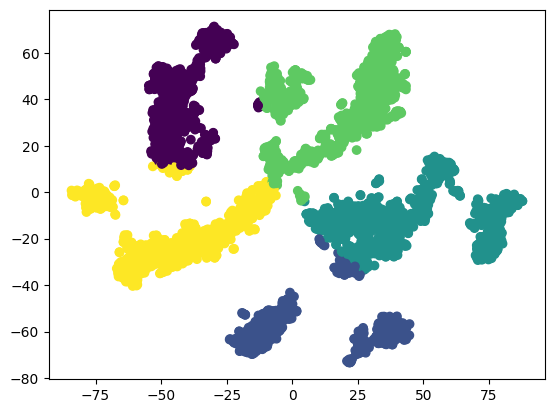

In [5]:
best_k=5
kmean = KMeans(n_clusters=best_k, random_state = 42 , n_init=10)
kmean.fit(df)
label = kmean.labels_ 

plt.scatter(df['t-SNE-1'],df['t-SNE-2'],c=label, cmap='viridis')
plt.show()

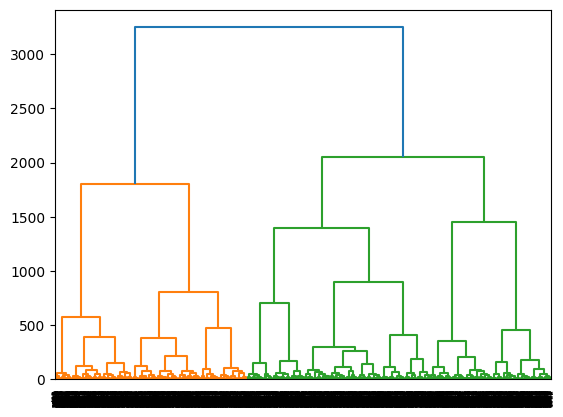

In [6]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


z=shc.linkage(df,method='ward')
shc.dendrogram(z,no_plot=False)
plt.show()